Part1 : Exploraty Data Analysis

On commence par importer les bibliothéques utiles et aussi intégrer le fichier '.csv' sur lequel on va travailler
pour accéder aux données.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ici on va pouvoir afficher le pourcentage de personne qui ont survécu dans le graphique de gauche et le nombre dans l'histogramme de droite.

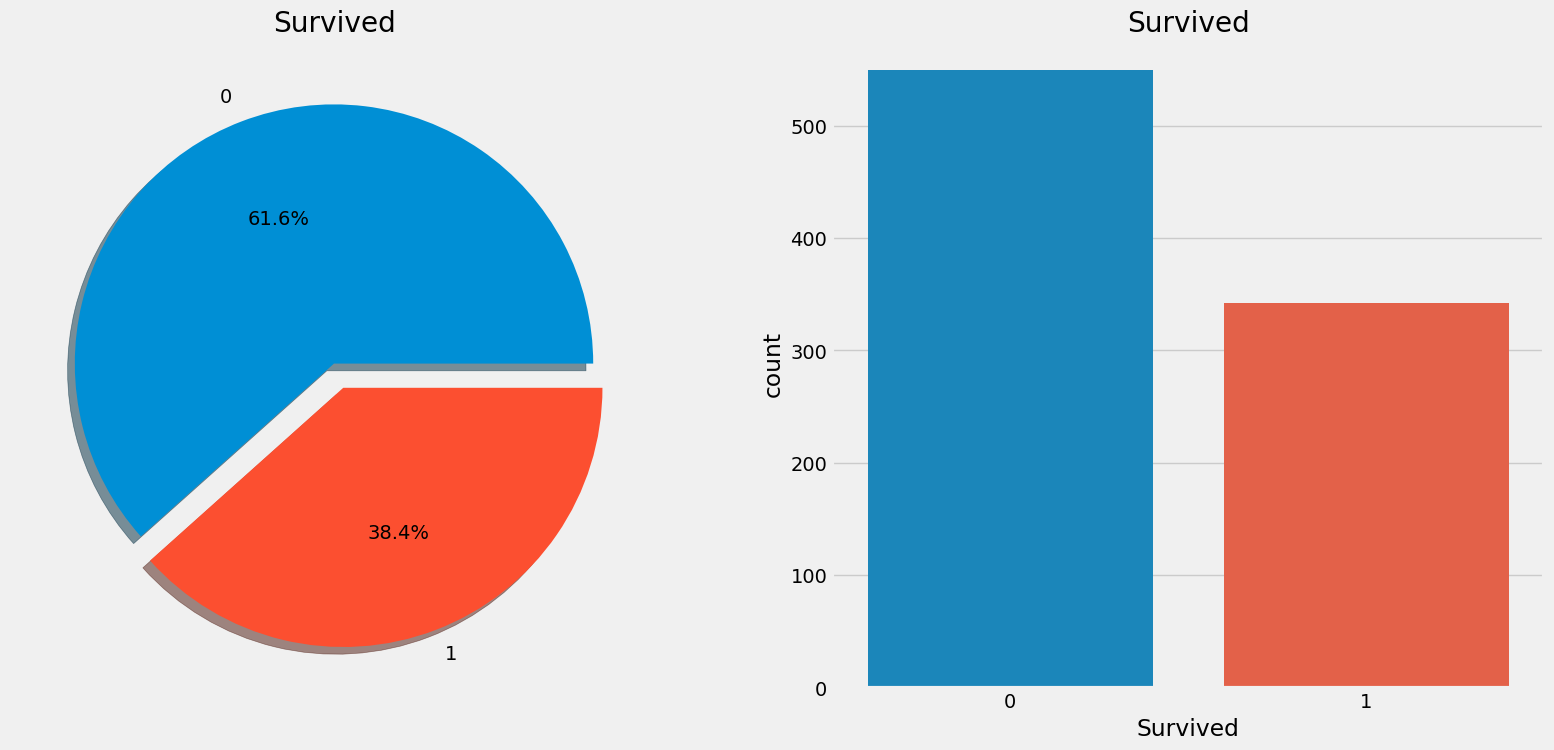

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Permet d'aller un peu plus en profondeur dans les infos et faire le tri des survivants par sexe.

In [5]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Graphique de gauche : la répartition en pourcentage des survivants entre homme et femme et sur le graphique de droite : la répartition en nombre entre les morts et les survivants, par sexe.

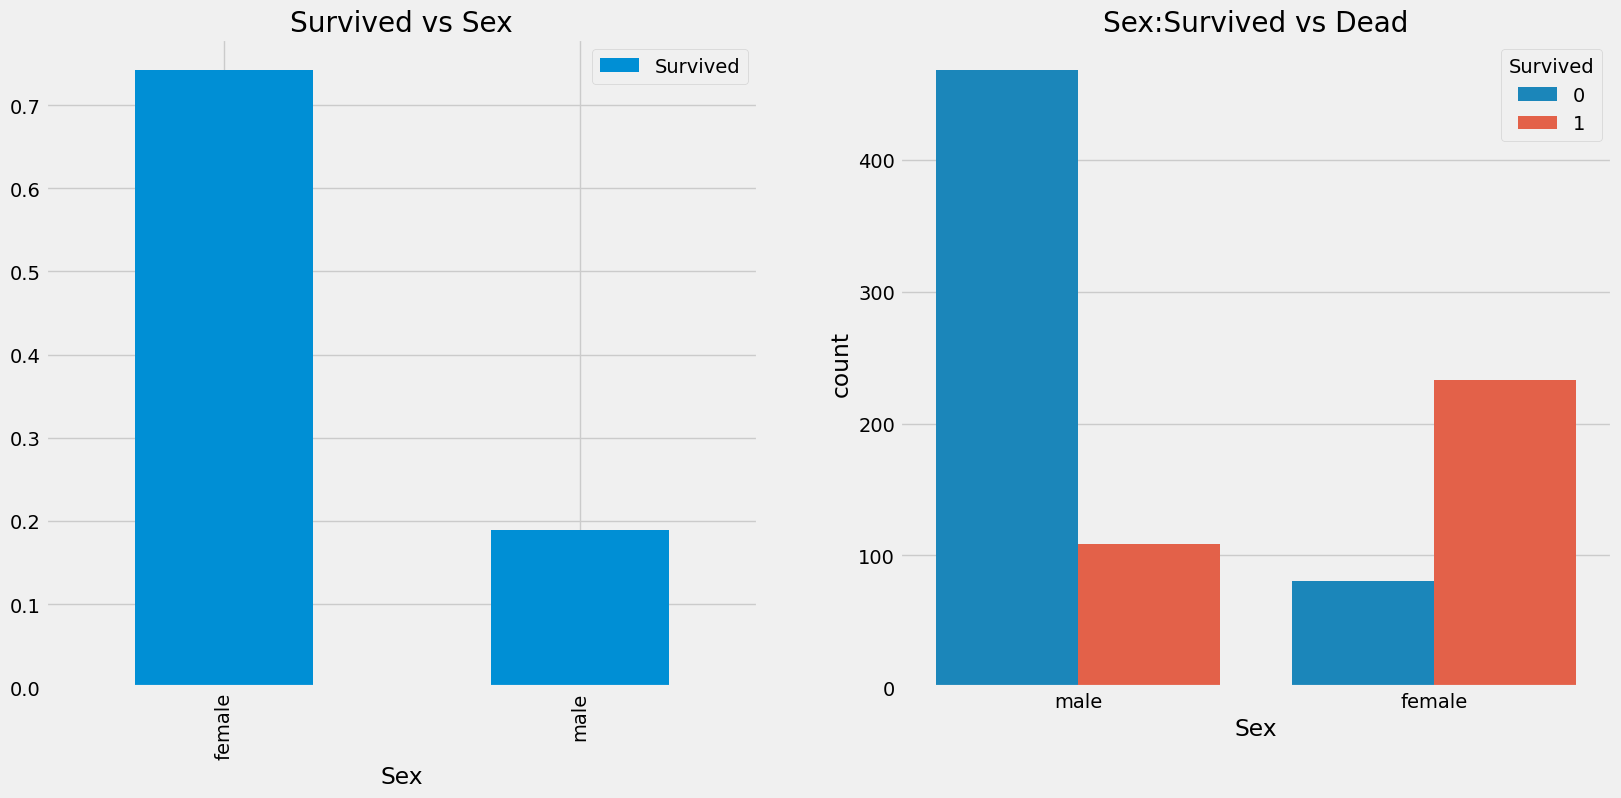

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [7]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Le graphique de gauche montre le nombre de survivant en fonction de leur classe et le graphique de droite la répartiton des morts et des survivants suivant leur classe.

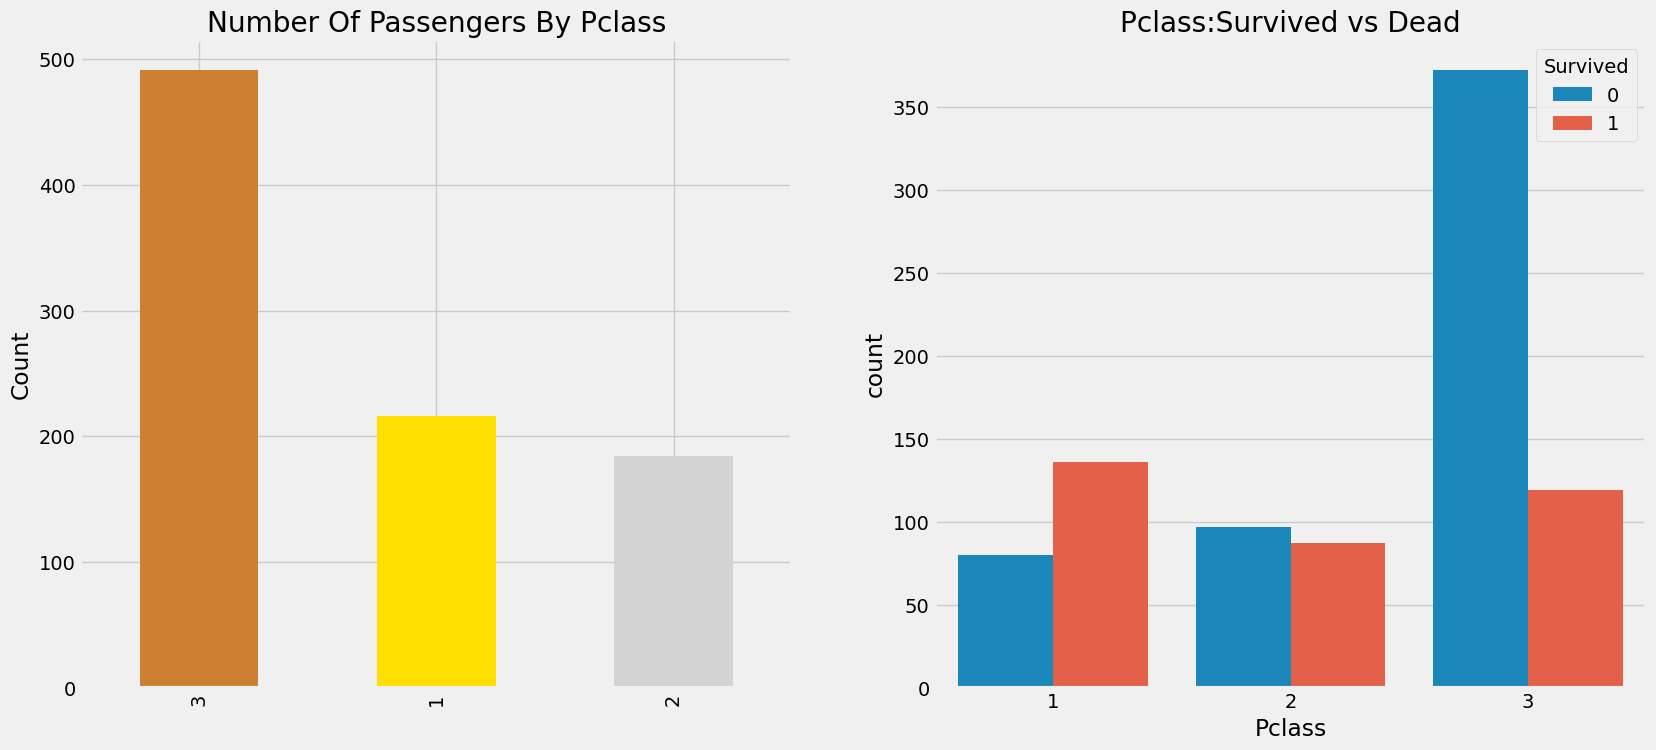

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [9]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

Ces deux courbes reprensent le pourcentage de survivants suivant la classe. La courbe orange détermine le nombre de survivante et le courbe bleue détermine le nombre de survivant. Le tout suivant leur classe. On remarque par exemple que quasiment toutes les femmes en classe 1 ont survécues, alors qu'il n'y environ que la moitié des femmes en classe 3 qui ont survécues.

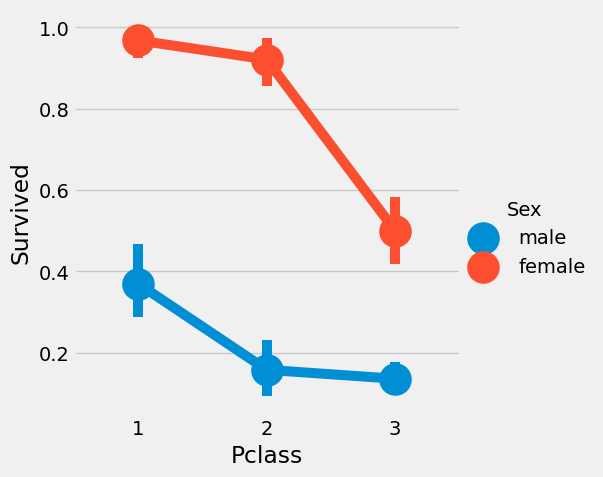

In [13]:
sns.catplot(data=data, x='Pclass',y='Survived',hue='Sex', kind='point')
plt.show()

Permet de déterminer le passager le plus jeune et le plus vieux ainsi que l'âge moyen.

In [14]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


Le graphique 1 permet de comparer le nombre moyen de personne qui ont survécus suivant leur âge et leur classe, le graphique 2 fait la même chose mais prend en compte le sexe et non la classe.

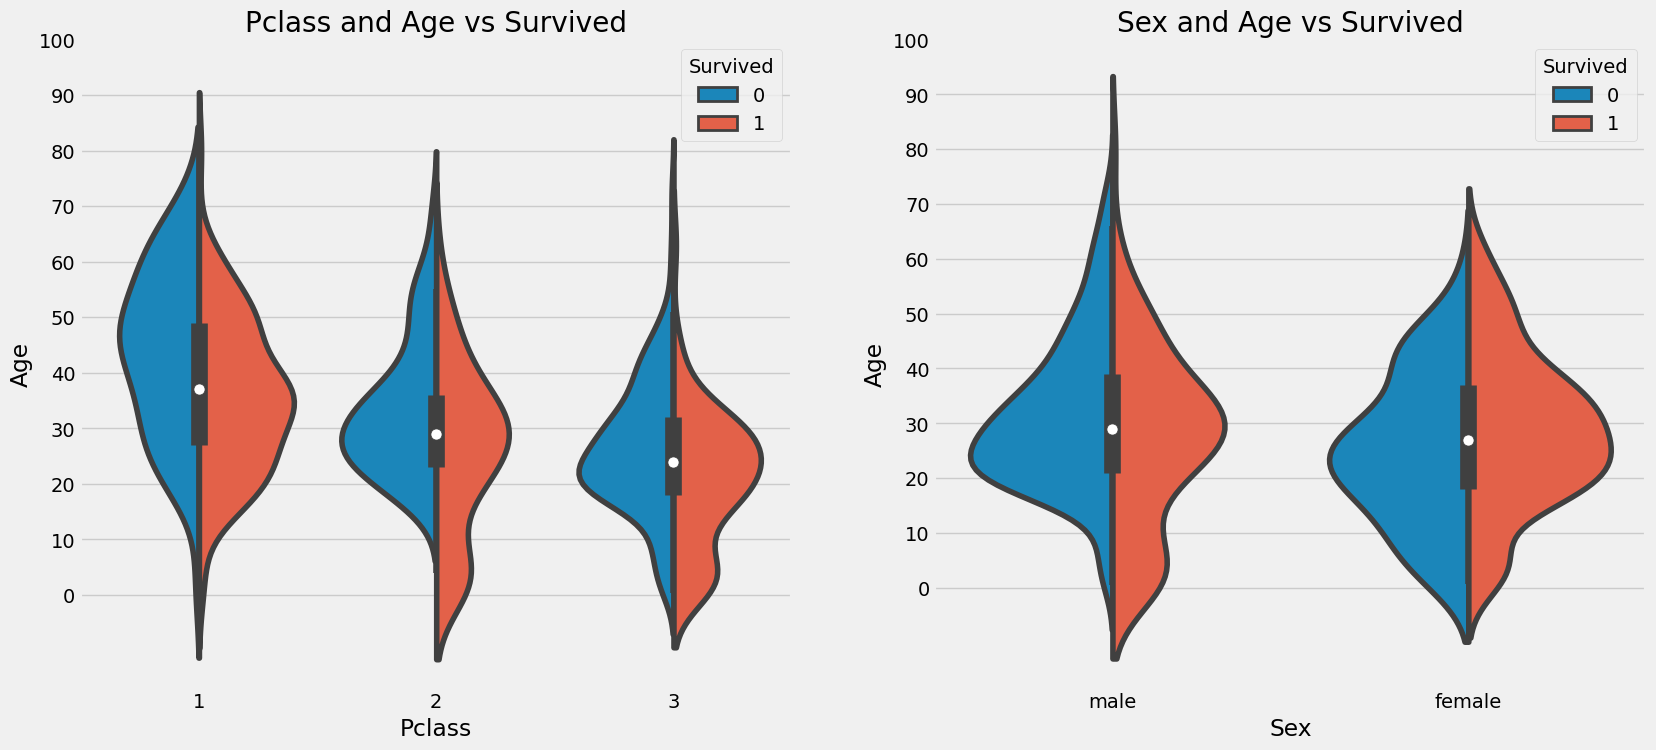

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass",y="Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Le problème que l'on rencontre est que l'on a vu que l'on a des valeurs nulles au départ, les calculs peuvent donc être faussés. On ne peut pas non plus remplacer les valeurs nulles par la moyenne (29 ans) car cela fausserait aussi les resultats. Donc dans un premier temps, on va classer chaque personne par leur titre qui donnera le premier tableau, en répartissant en même temps le sexe de chacun.

In [21]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


On voit que l'on a plusiuers types de titres, on va donc en rassembler certains dans un même titres et ensuite en faire la moyenne pour chacun ce qui donne le résultat suivant :

In [23]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [24]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

data.Age.isnull().any()

False

Ici, une fois que l'on a remplacé les âges grâce au âges moyens calculés précédèment, on vérifie que notre dataset est toujours cohérente, on voit que c'est le cas car on a les mêmes extrêmes, et les mêmes chiffres qu'avec les premiers calculs.

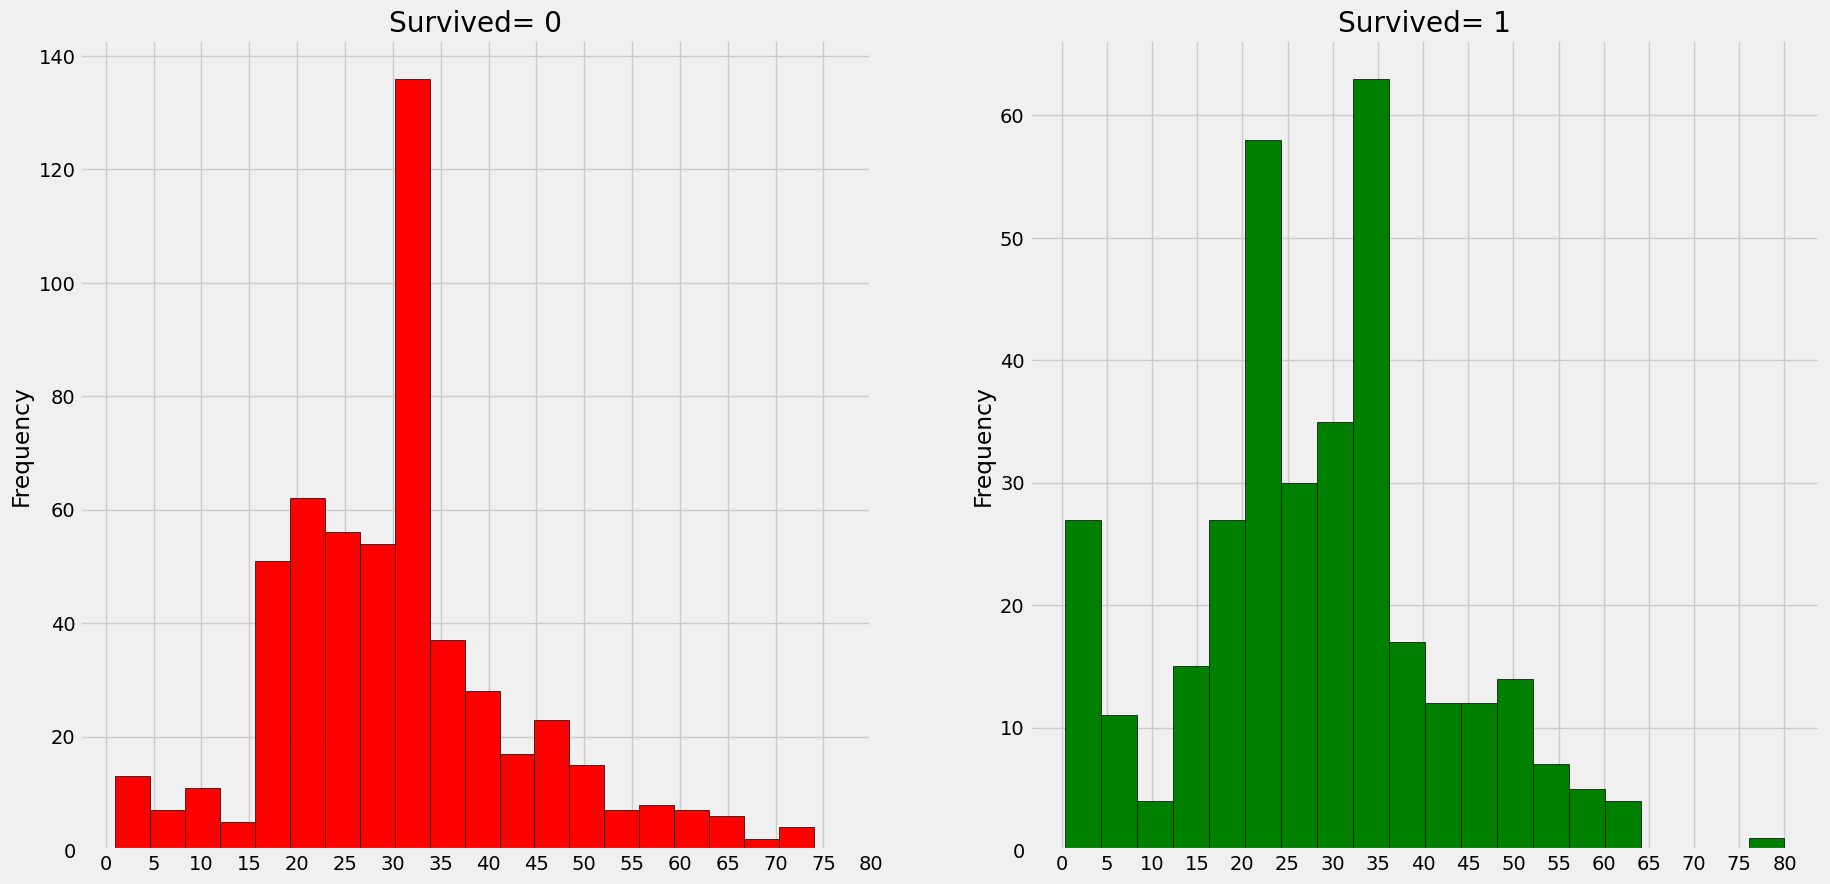

In [25]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

Ces graphiques montre la répartition, pour chaque titre, dans les 3 classes en pourcentage.

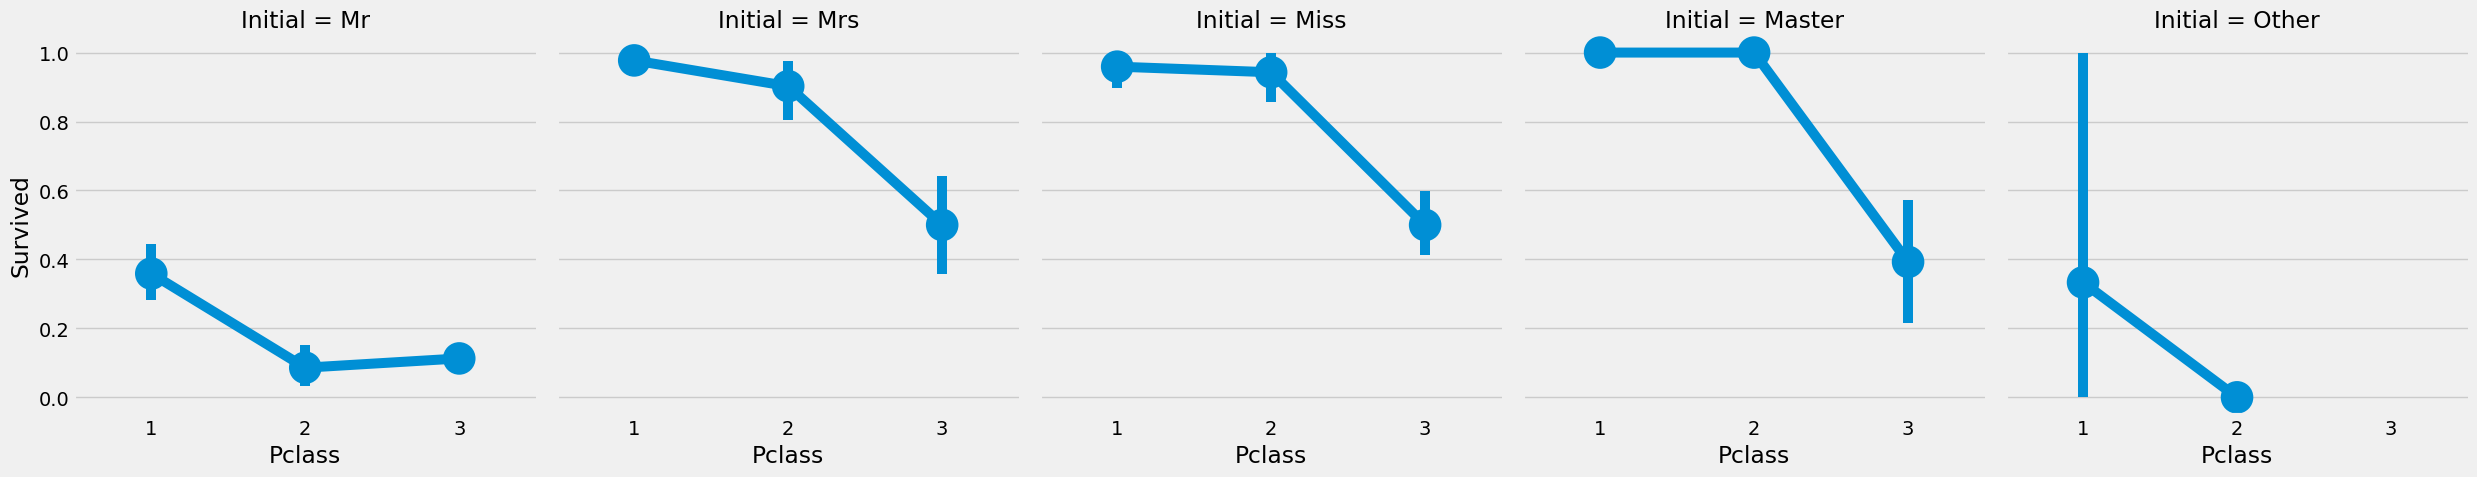

In [27]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data, kind='point')
plt.show()

Ici on rajoute un critère, le port d'embarcation, afin de voir plus précisement les personnes qui ont survécues ou non, en fonction de leur sexe, leur classe et leur port d'embarcation.

In [28]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

Ici le graphique indiquant la répartition en pourcentage des survivant suivant leur port d'embarcation.

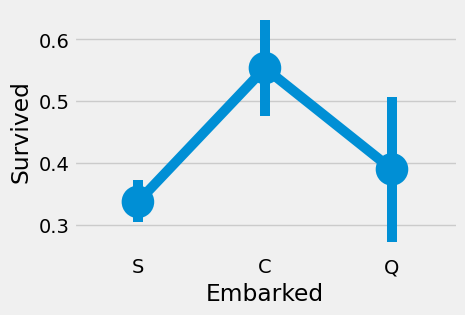

In [30]:
sns.catplot(x='Embarked',y='Survived',data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

graphique 1 : nb de passager suivant le port d'embracation / graphique 2 : répartition du nombre d'hommes & de femmes suivant le port d'embarcation / graphique 3 : répartition du nombre de personnes mortes ou qui ont survécues suivant le port d'embarcation / graphique 4 : répartiton du nombre de personnes suivant leur classe par port d'embarcation.

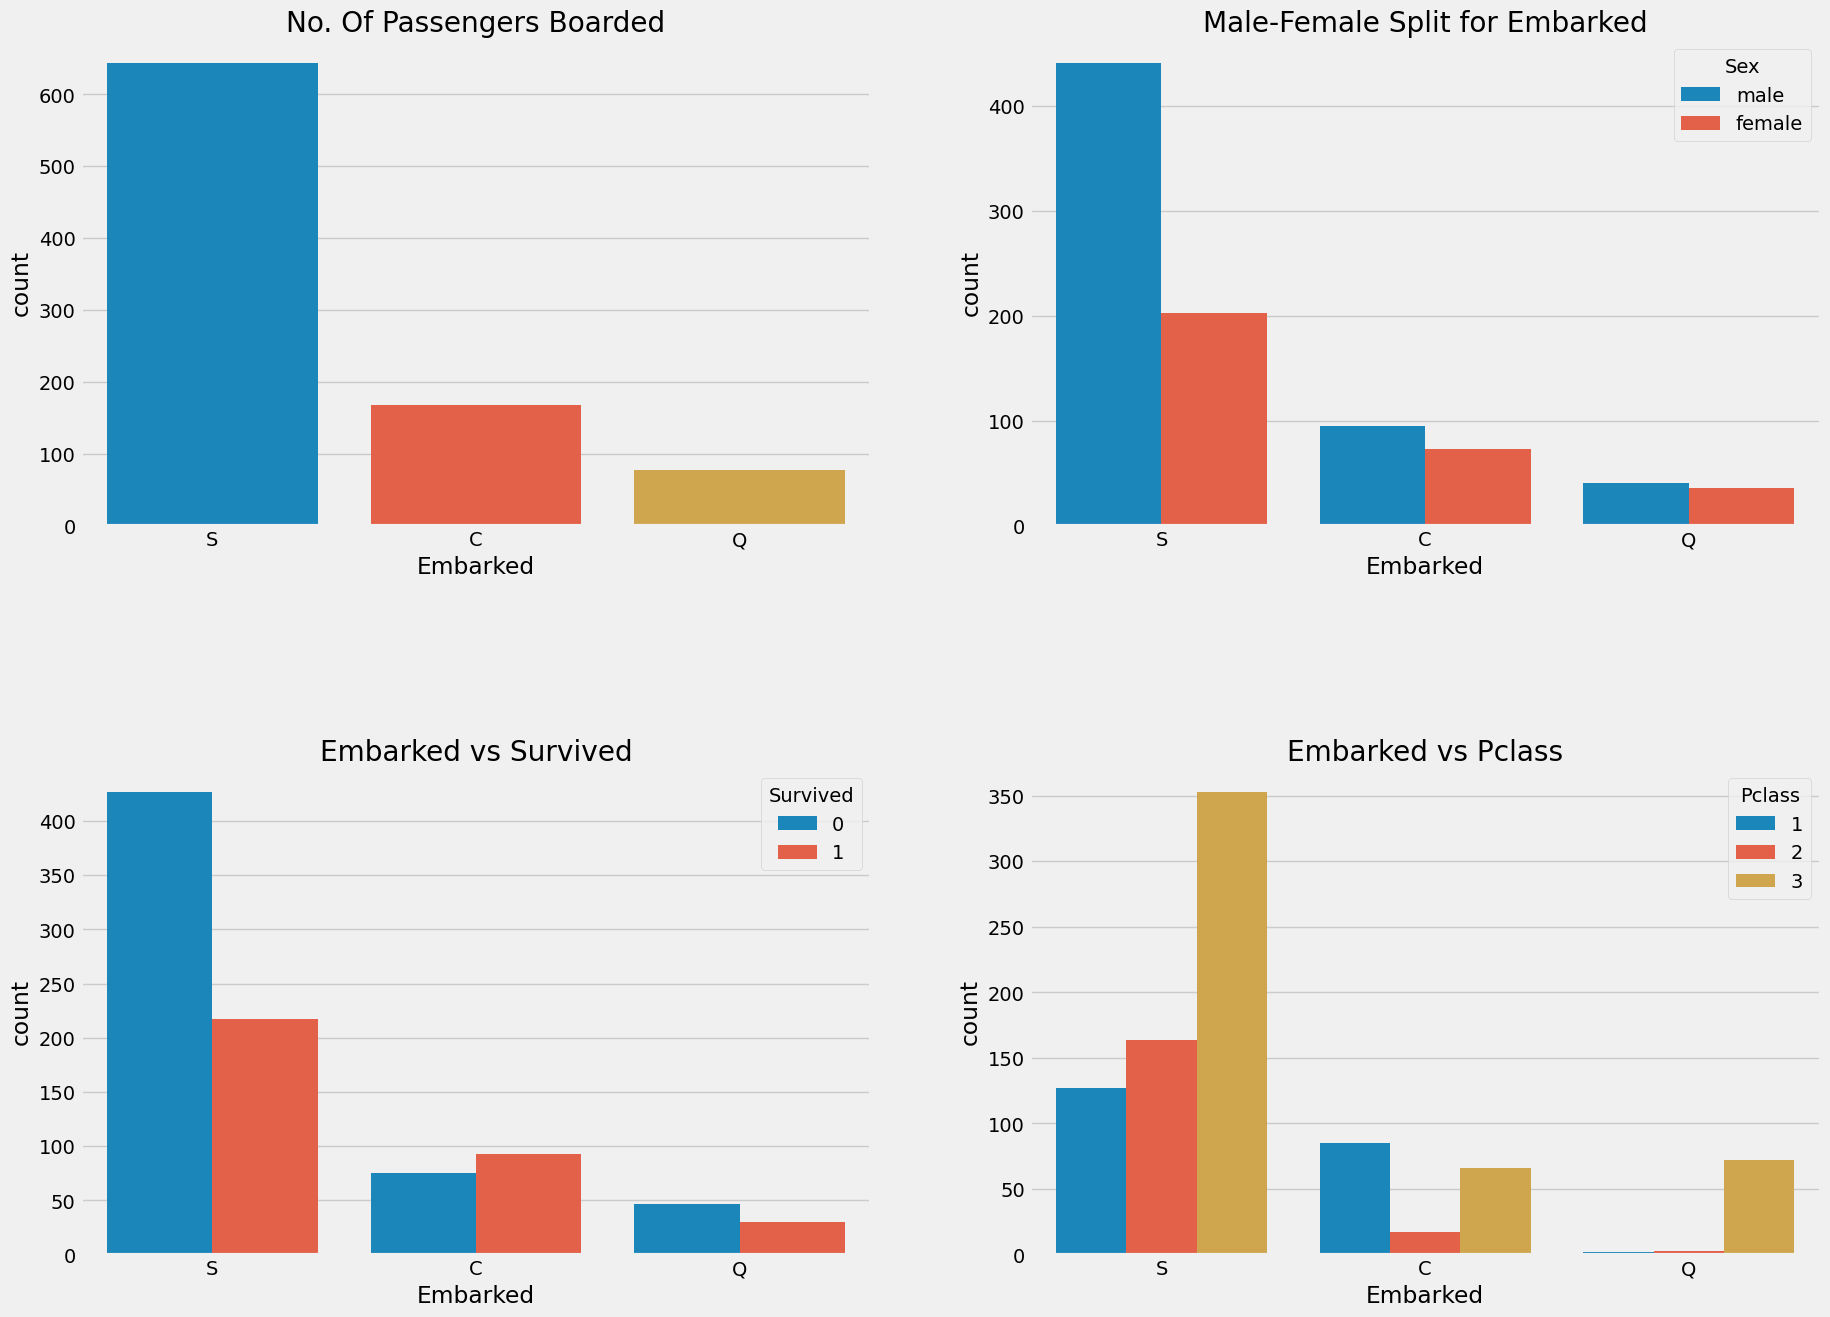

In [31]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

courbe orange : le pourcentage de femmes ayant survécues suivant leur classe pour chaque port d'embarcation / courbe bleue : idem pour les hommes.

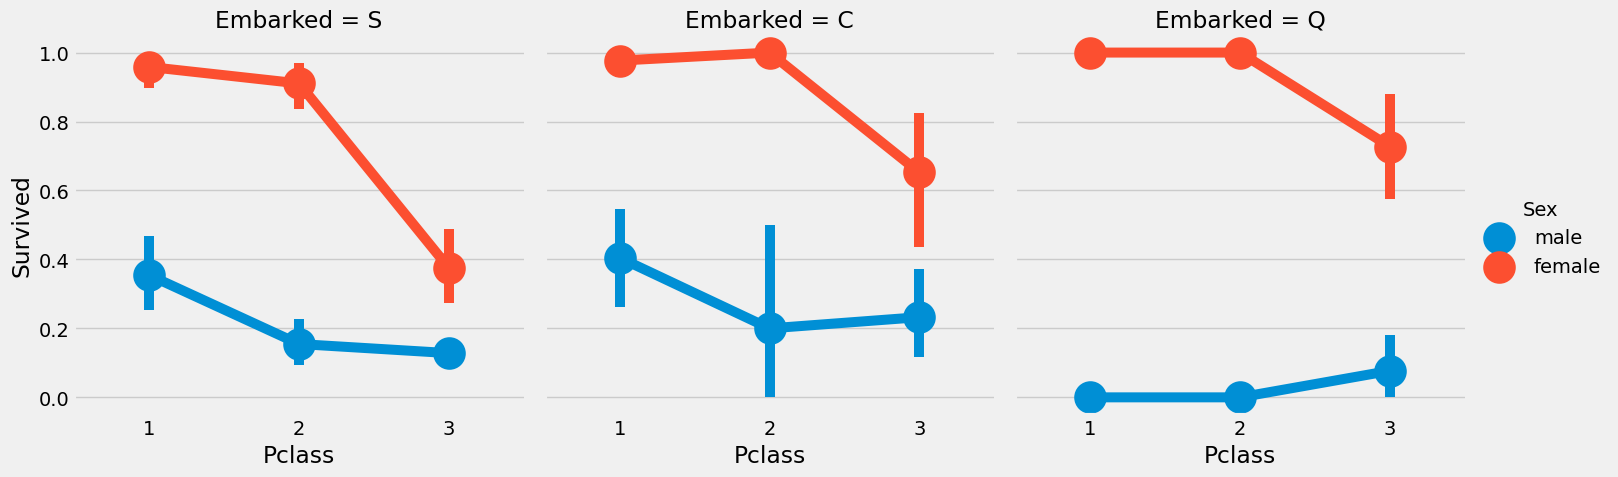

In [32]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',col='Embarked',data=data, kind='point')
plt.show()

In [33]:
data['Embarked'].fillna('S',inplace=True)

data.Embarked.isnull().any()

False

Ce tableau permet de voir la répartition des morts et survivants en fonctions du nombres personnes les accompagnant. On voit par exemple que 210 personnes seules ont survécues alors que les personnes accompagnées de 2 personnes par exemple n'ont été que 13 à survivre. On observe surtout qu'il y avait beaucoup de personnes seules.

In [34]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


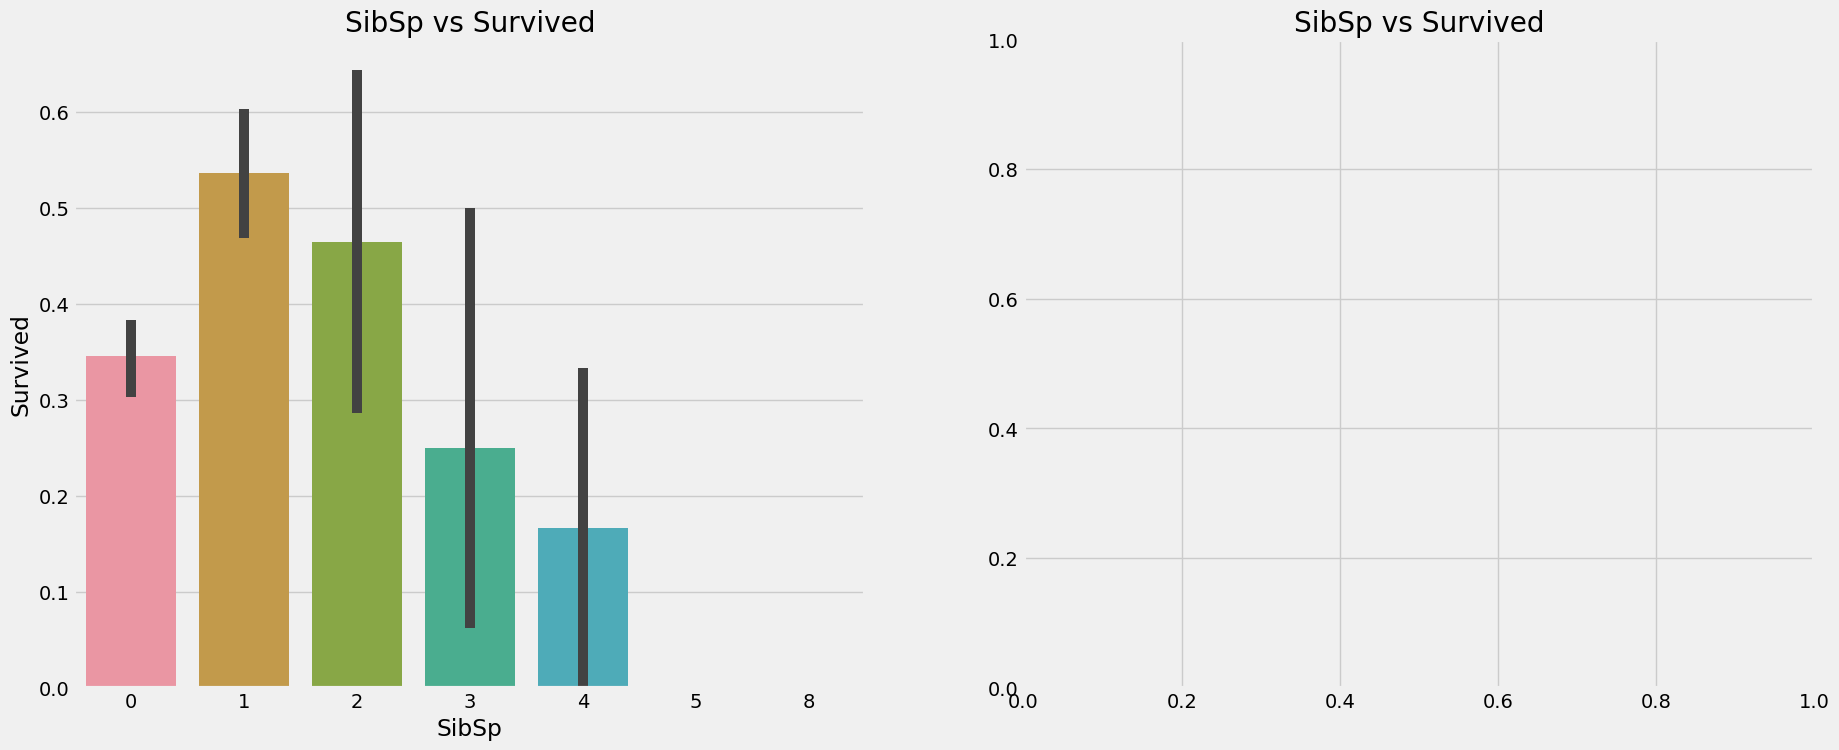

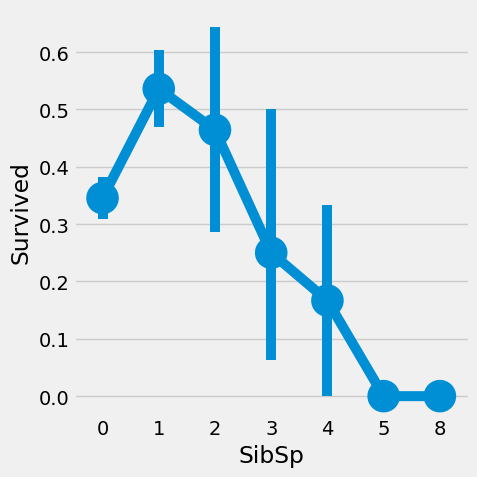

In [59]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp', y='Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.catplot(x='SibSp', y='Survived',data=data,ax=ax[1], kind='point')
ax[1].set_title('SibSp vs Survived')
#plt.close(2)
plt.show()

Ici le tableau montre le nombre de personnes qui étaient accompagnées et par combien de personnes à chaque fois, par classe.

In [39]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [40]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


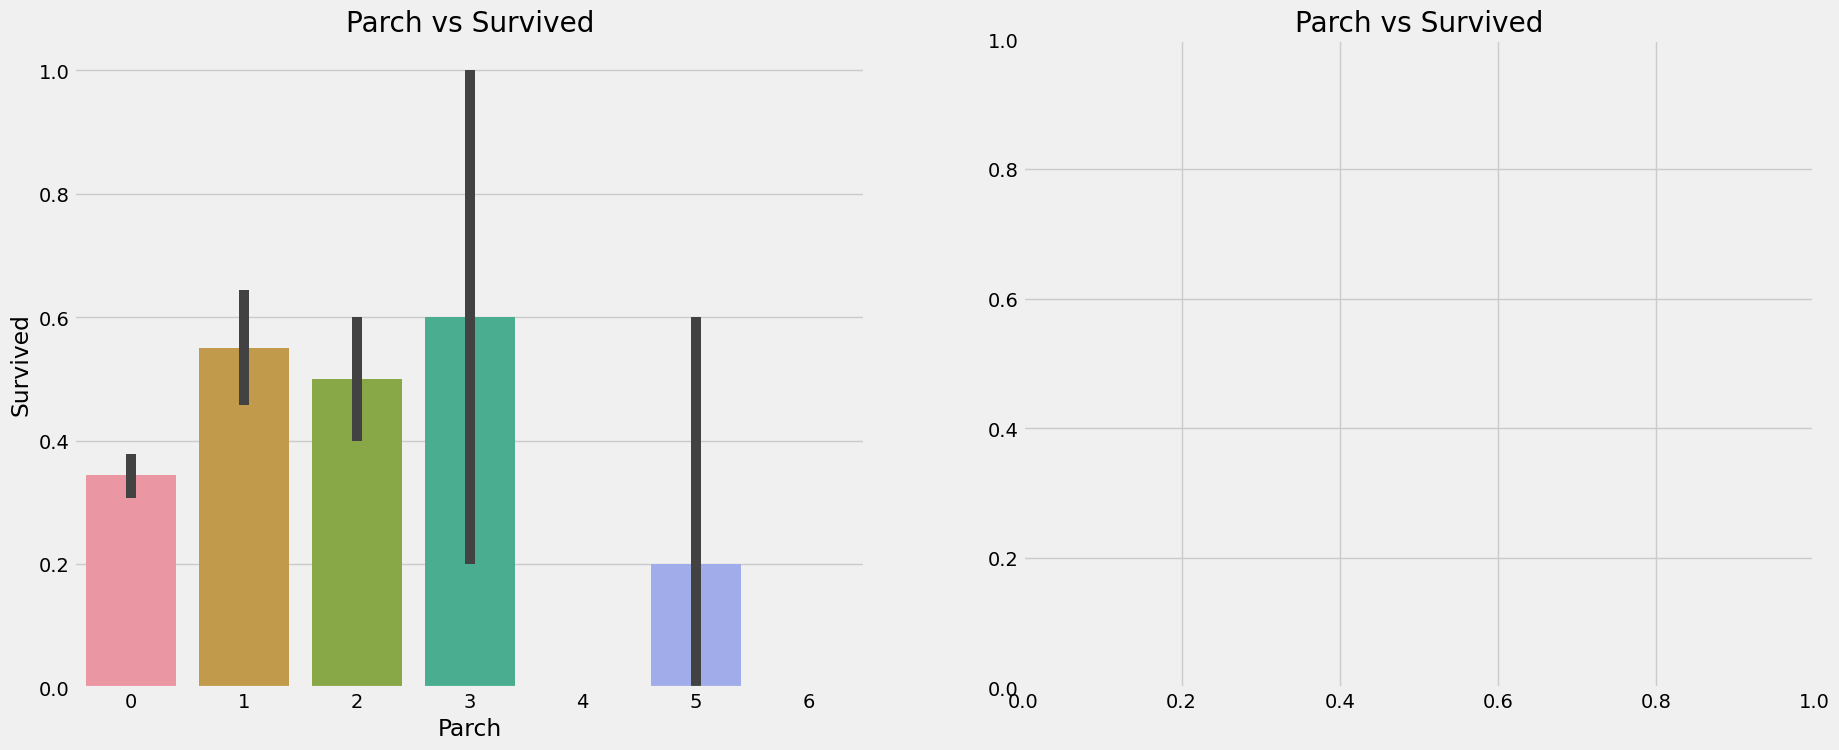

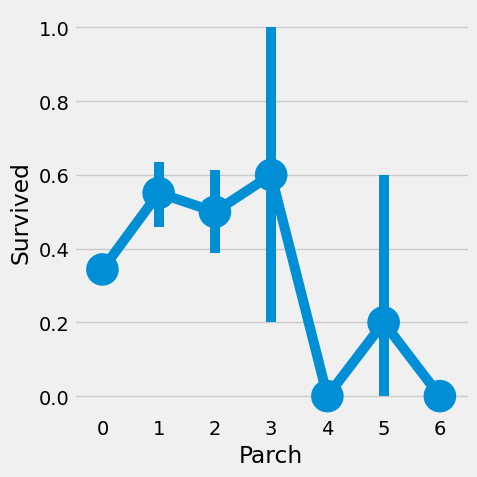

In [58]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch', y='Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.catplot(x='Parch', y='Survived',data=data,ax=ax[1], kind='point')
ax[1].set_title('Parch vs Survived')
#plt.close(2)
plt.show()

Ici on va observer le plus gros, le plus petit et la moyenne des tarifs.

In [44]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


Chaques graphiques indique le nombre de personne en pourcentage en fonction du tarifs pour chaque classe.

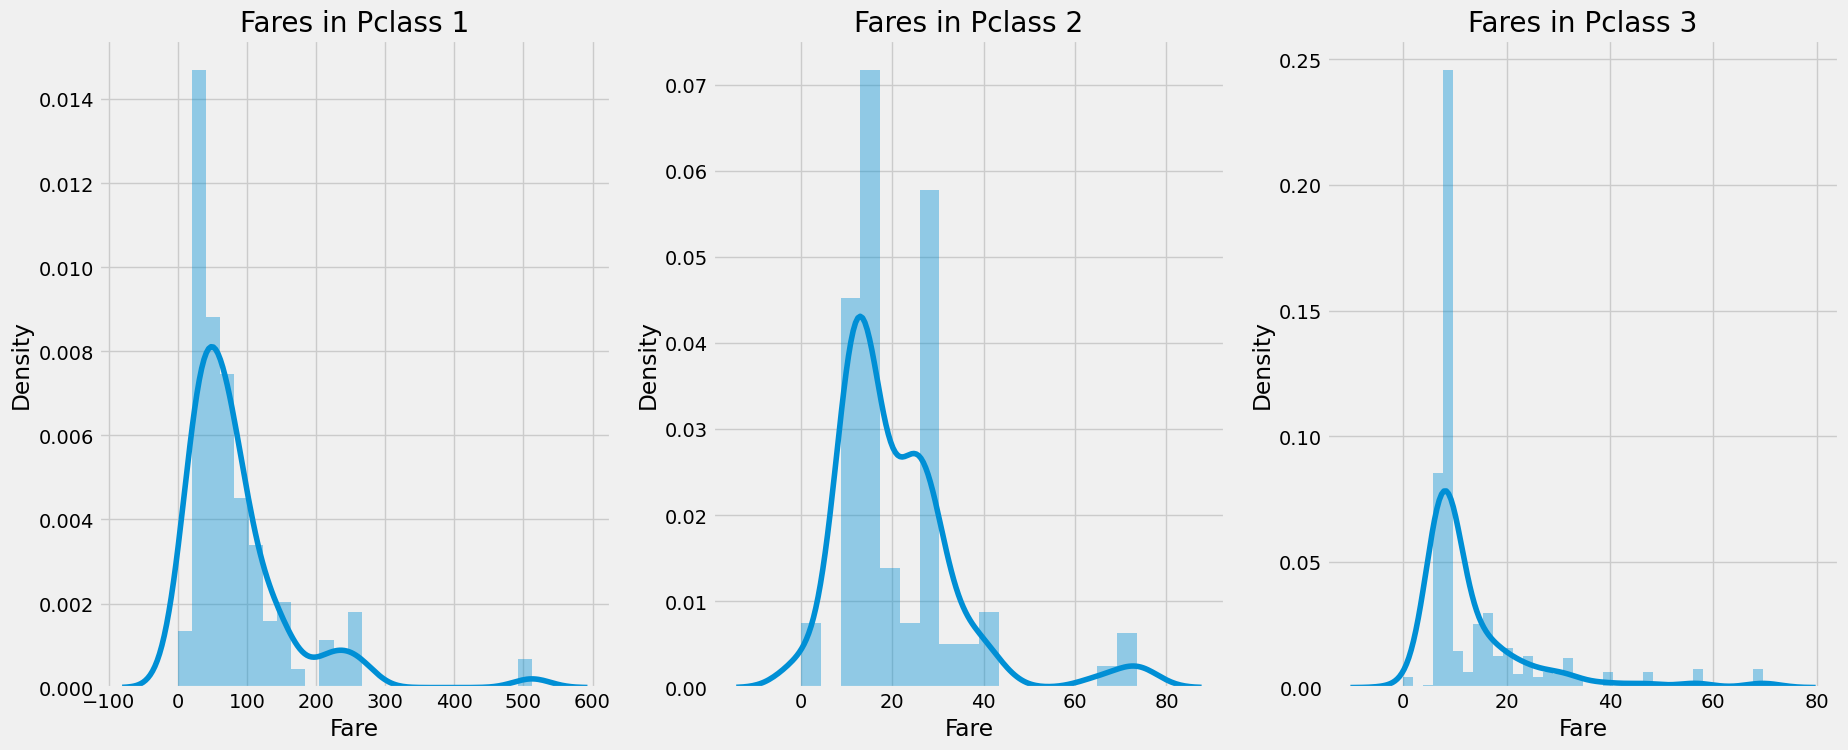

In [45]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

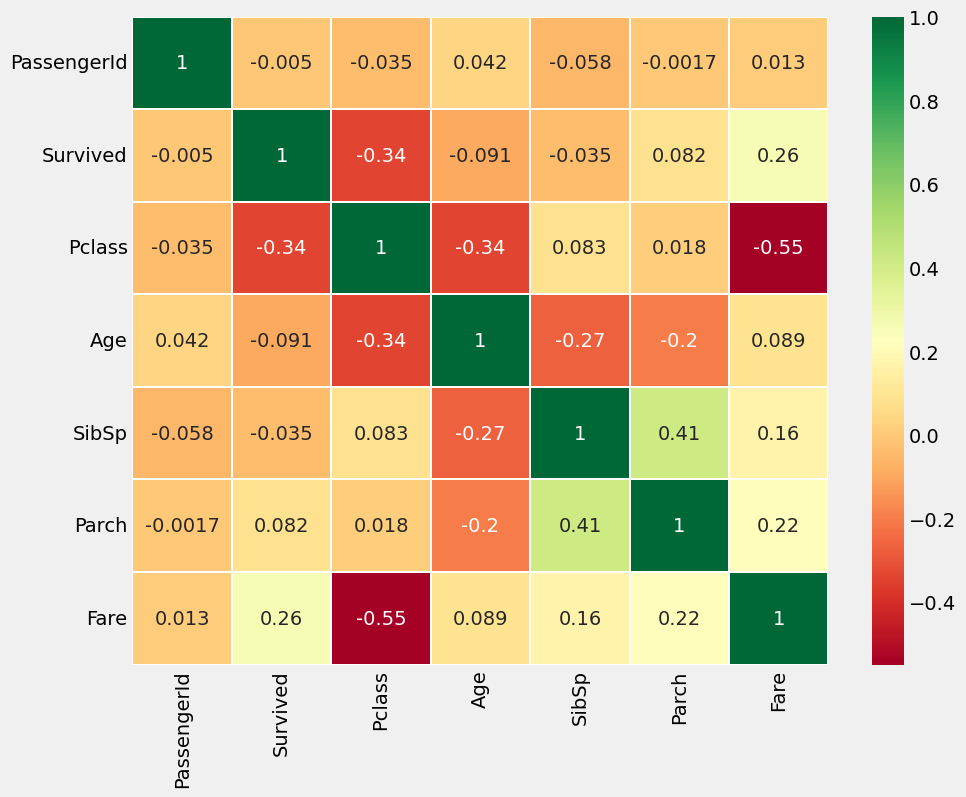

In [46]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Part2: Feature Engineering and Data Cleaning

D'abord il faut créer des groupes d'âges, car il est facile de séparer un groupe par le sexe car il n'y a que 2 valeurs, mais pour l'âge il peut y en avoir un très grand nombre, donc ici on créé 5 groupes d'âges.

In [47]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


Ce tableau permet d'observer la répartition du nombre de passager suivant les 5 groupes d'âges.

In [48]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


Ici chaques graphiques indiquent la répartition en pourcentage des groupes d'âges pour chaque classe.

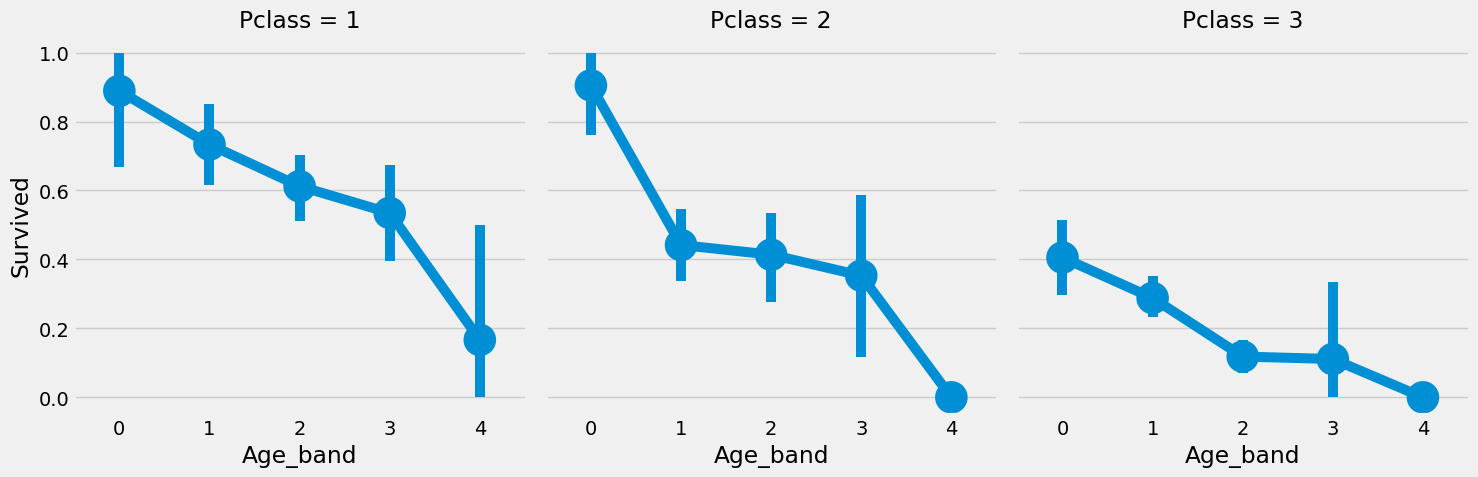

In [49]:
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='point')
plt.show()

Ici on va observer si les chances de survie sont meilleures si l'on est seul ou bien accompagné de notre famille, suivant le nombre de personne par famille. Par exemple, on a plus de chance de survie accompagné de 3 personnes que lorsque l'on est seul. Le pire étant d'être une famille nombreuses (>4)

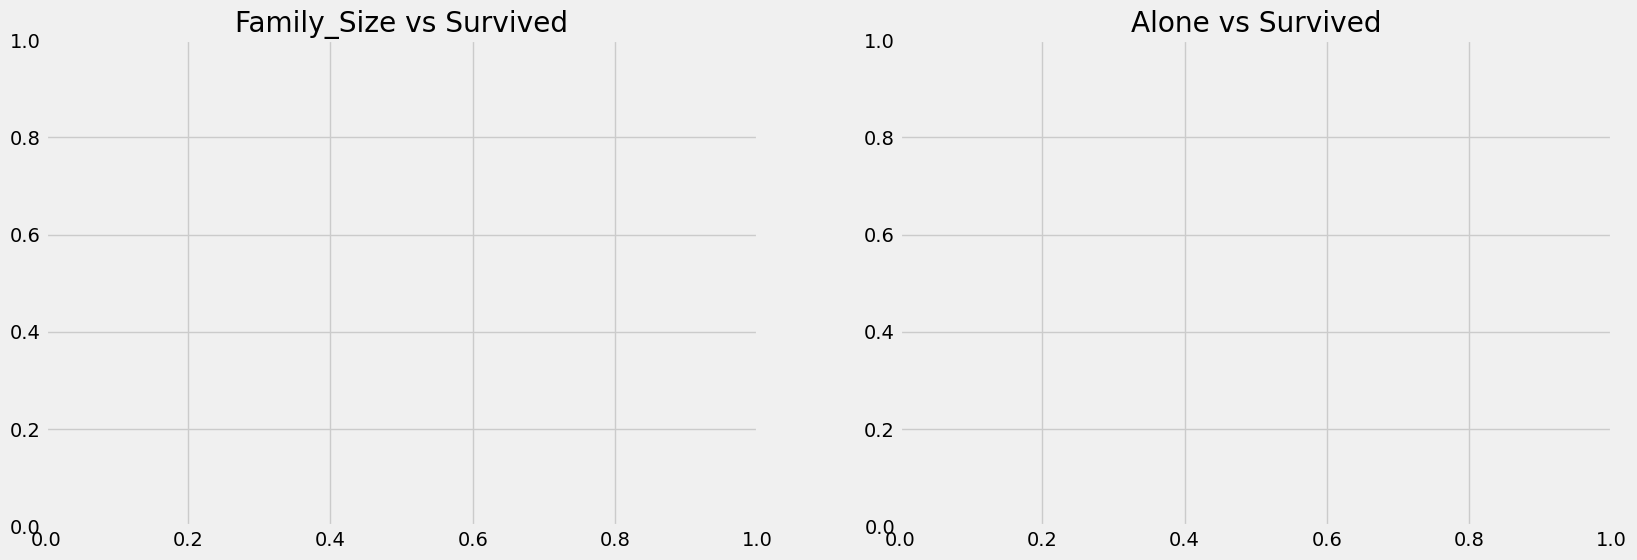

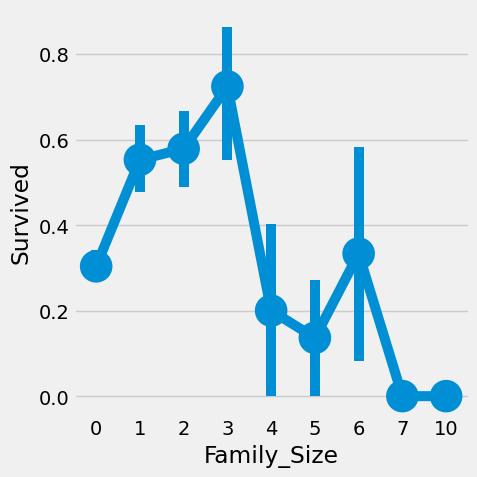

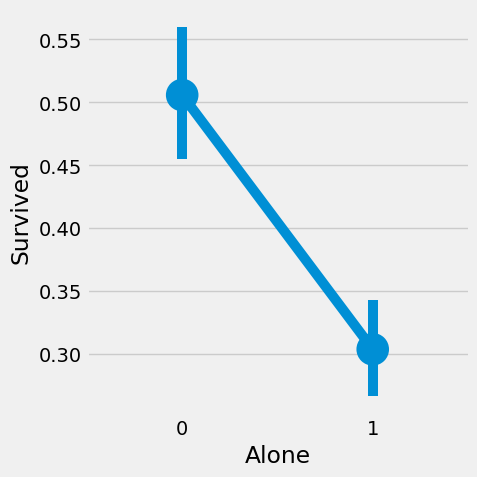

In [60]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.catplot(data=data, x='Family_Size', y='Survived', ax=ax[0], kind='point')
ax[0].set_title('Family_Size vs Survived')
sns.catplot(data=data, x='Alone', y='Survived', ax=ax[1], kind='point')
ax[1].set_title('Alone vs Survived')
#plt.close(2)
#plt.close(3)
plt.show()

le graphique ci-desous permet d'observer que le nombre de personne seule n'est pas lié aux classes, peut être juste pour les femmes de la classe 3 mais il y a peut de différence.

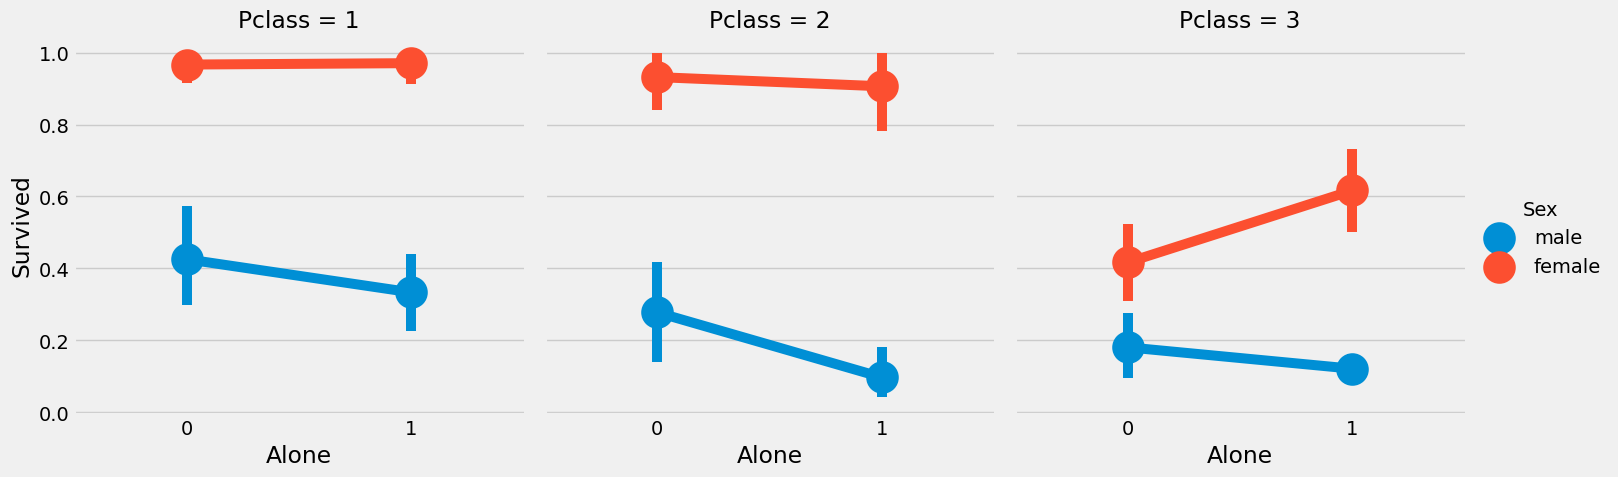

In [51]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')
plt.show()

Ici on créé un tableau mettant en valuer 4 groupes de tarifs, on observe que plus on  payé cher, plus on a de chance de survivre.

In [52]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


Comme avec les âges plus haut, on créé 4 groupes de tarifs, permettant de voir la répartition plus facilement. On voit que les chances de survie augmentent lorsque l'on se rapproche de la classe 3, pour les hommes, comme pour les femmes.

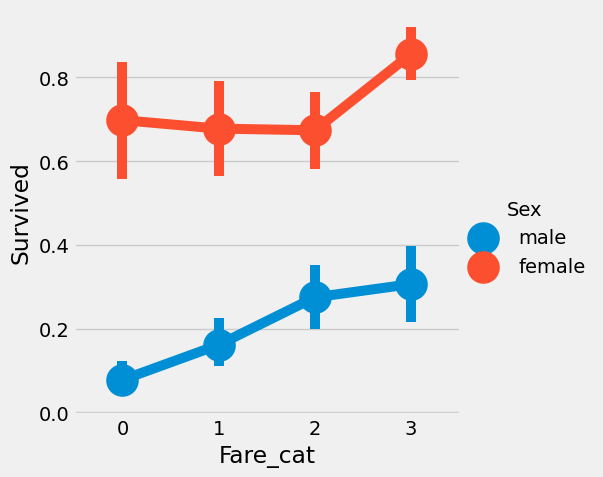

In [54]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')
plt.show()

Pour pouvoir interpréter et faire fontionner la heatmap suivante on doit convertir les valeurs alphabétiques (strings) en valeurs numériques car sinon c'est impossible à interpréter, c'est donc la première étape, modifier 'sex, 'embarked' et 'initial'.

La heatmap va permettre de comparer des arguments par rapport à un autre et en l'occurence permettre de déterminer les chances de survie suivant deux arguments.

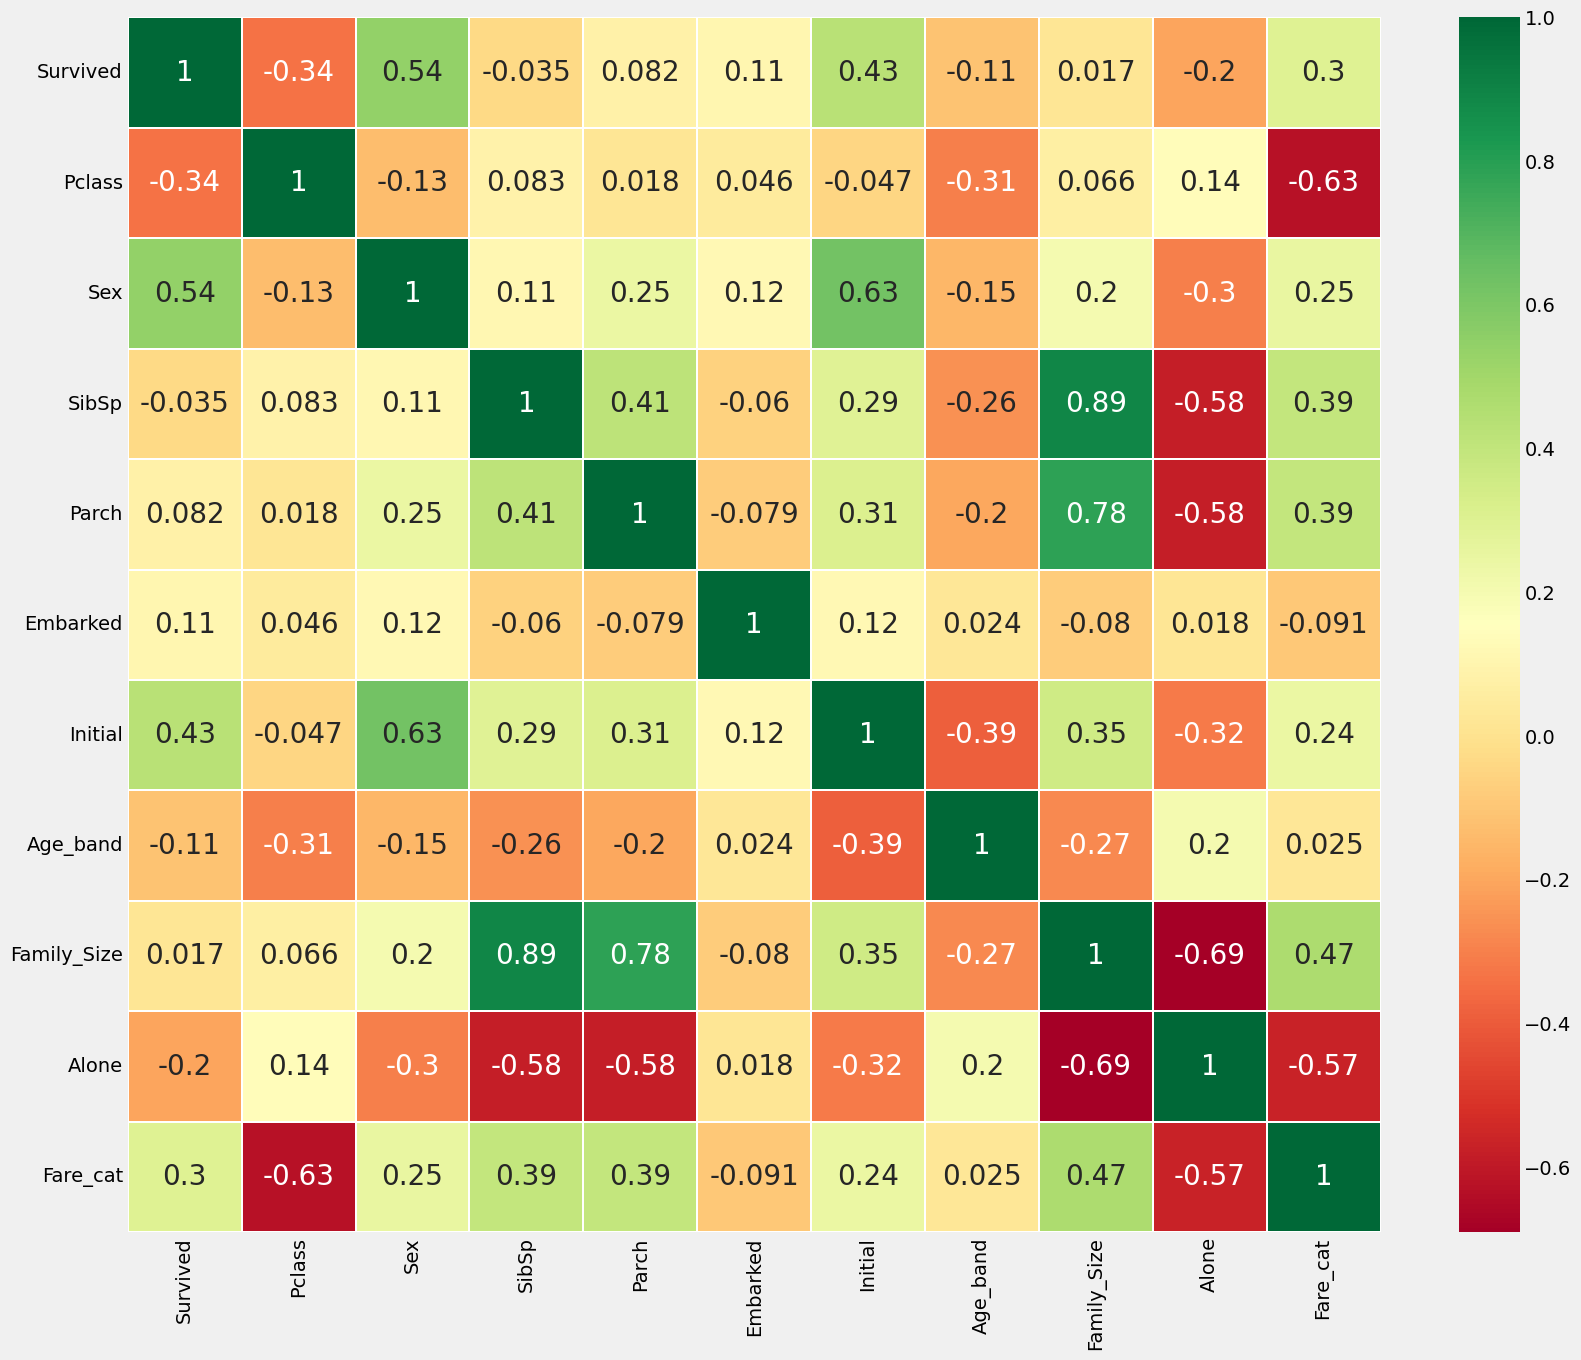

In [56]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()